In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats

In [3]:
data = pd.read_csv('A_Z_medicines_dataset_of_India.csv')
data.head()

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN


In [4]:
data.isnull().sum()

id                         0
name                       0
price(₹)                   0
Is_discontinued            0
manufacturer_name          0
type                       0
pack_size_label            0
short_composition1         0
short_composition2    141802
dtype: int64

In [5]:
# Separate categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create new DataFrames for categorical and numerical data
categorical_data = data[categorical_columns]
numerical_data = data[numerical_columns]

categorical_data = pd.DataFrame(categorical_data)
categorical_data.head(10)

,name,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,Augmentin 625 Duo Tablet,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,Azithral 500 Tablet,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,Ascoril LS Syrup,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,Allegra 120mg Tablet,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,Avil 25 Tablet,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN
5,Allegra-M Tablet,Sanofi India Ltd,allopathy,strip of 10 tablets,Montelukast (10mg),Fexofenadine (120mg)
6,Amoxyclav 625 Tablet,Abbott,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
7,Azee 500 Tablet,Cipla Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
8,Atarax 25mg Tablet,Dr Reddy's Laboratories Ltd,allopathy,strip of 15 tablets,Hydroxyzine (25mg),NaN
9,Ascoril D Plus Syrup Sugar Free,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Phenylephrine (5mg),Chlorpheniramine Maleate (2mg)


In [6]:
numerical_data = pd.DataFrame(numerical_data)
numerical_data.head(10)

,id,price(₹)
0,1,223.42
1,2,132.36
2,3,118.00
3,4,218.81
4,5,10.96
5,6,241.48
6,7,223.27
7,8,132.38
8,9,85.50
9,10,129.00


In [7]:
data.shape

(253973, 9)

In [8]:
data.describe()

,id,price(₹)
count,253973.000000,253973.000000
mean,126987.000000,270.530844
std,73315.834296,3029.584134
min,1.000000,0.000000
25%,63494.000000,48.000000
50%,126987.000000,79.000000
75%,190480.000000,140.000000
max,253973.000000,436000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price(₹)            253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 15.7+ MB


<h2> Univariate Analysis </h2>

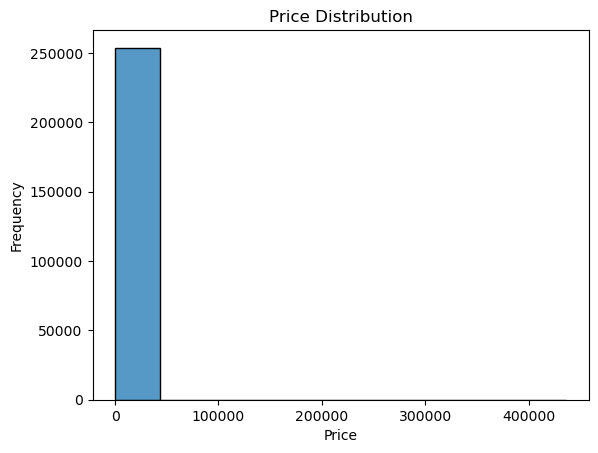

In [10]:
sns.histplot(data=numerical_data, x='price(₹)', bins=10, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

</p> Identify Outliers </p>

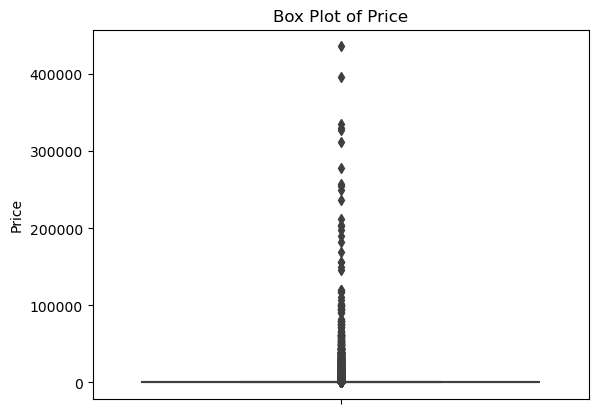

In [11]:
# Box plot
sns.boxplot(data=numerical_data, y='price(₹)')
plt.ylabel('Price')
plt.title('Box Plot of Price')
plt.show()

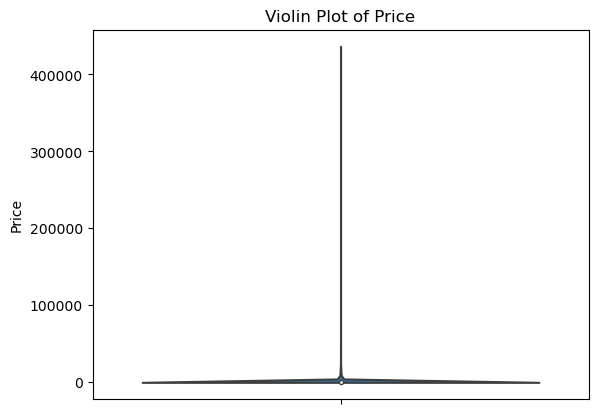

In [12]:
# Violin plot
sns.violinplot(data=numerical_data, y='price(₹)')
plt.ylabel('Price')
plt.title('Violin Plot of Price')
plt.show()

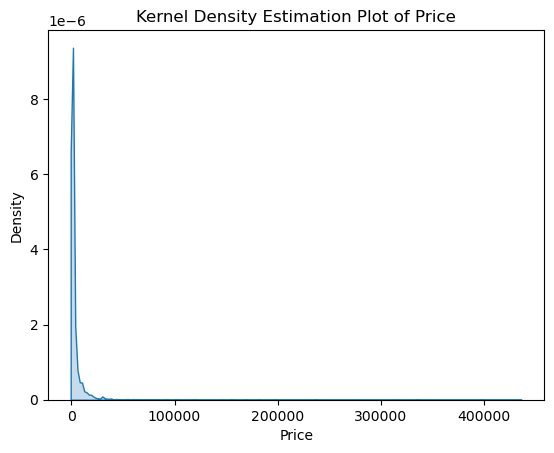

In [13]:
# Kernel density estimation (KDE) plot
sns.kdeplot(data=numerical_data, x='price(₹)', shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot of Price')
plt.show()

In [14]:
# Apply winsorization to handle outliers
win_prices = mstats.winsorize(numerical_data['price(₹)'], limits=[0.05, 0.05])

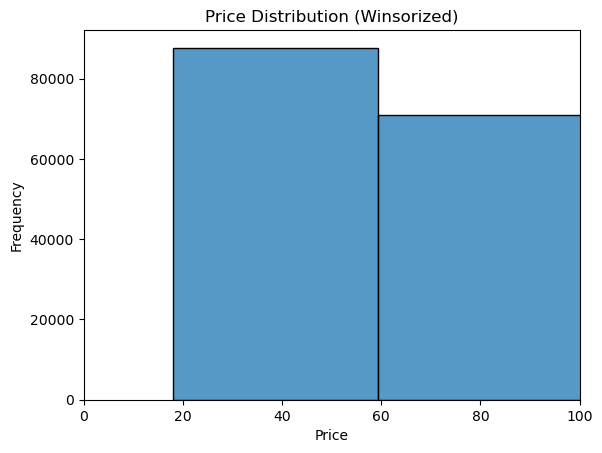

In [15]:
# Create a histogram plot with winsorized data
sns.histplot(data=win_prices, bins=10, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution (Winsorized)')

# Set x-axis limit
plt.xlim(0, 100)

# Show the plot
plt.show()

<p> In this code, mstats.winsorize() from the SciPy library is used to apply winsorization to the 'price(₹)' column. The limits parameter sets the proportion of data to be trimmed from both ends (in this case, 5% from each end).

After applying winsorization, the resulting winsorized prices are used to create the histogram plot. The remaining code for setting the x-axis limit and displaying the plot remains the same.</p>

<h3> Feature Engineering </h3>

<h4> Extracting Information from Text Columns </h4>

In [16]:
# Extracting the length of text
data['name_length'] = data['name'].apply(lambda x: len(str(x)))
data['manufacturer_length'] = data['manufacturer_name'].apply(lambda x: len(str(x)))

# Extracting the number of words in text
data['name_word_count'] = data['name'].apply(lambda x: len(str(x).split()))
data['manufacturer_word_count'] = data['manufacturer_name'].apply(lambda x: len(str(x).split()))

# Extracting the presence of certain keywords
keywords = ['keyword1', 'keyword2', 'keyword3']
for keyword in keywords:
    data[keyword + '_present'] = data['name'].apply(lambda x: 1 if keyword in str(x) else 0)

# Viewing the updated DataFrame
data.head()

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2,name_length,manufacturer_length,name_word_count,manufacturer_word_count,keyword1_present,keyword2_present,keyword3_present
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg),24,36,4,4,0,0,0
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN,19,27,3,3,0,0,0
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml),16,28,3,3,0,0,0
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN,20,17,3,3,0,0,0
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN,14,17,3,3,0,0,0


<h4> Creating Price Ranges </h4>

In [17]:
# Define the price range thresholds
low_threshold = 50
medium_threshold = 150
high_threshold = 300

# Create a new column with price ranges
data['price_range'] = pd.cut(data['price(₹)'], bins=[0, low_threshold, medium_threshold, high_threshold, float('inf')],
                             labels=['low price', 'medium price', 'high price', 'very high price'])

# Viewing the updated DataFrame
data.head(10)


,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2,name_length,manufacturer_length,name_word_count,manufacturer_word_count,keyword1_present,keyword2_present,keyword3_present,price_range
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg),24,36,4,4,0,0,0,high price
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN,19,27,3,3,0,0,0,medium price
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml),16,28,3,3,0,0,0,medium price
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN,20,17,3,3,0,0,0,high price
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN,14,17,3,3,0,0,0,low price
5,6,Allegra-M Tablet,241.48,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Montelukast (10mg),Fexofenadine (120mg),16,17,2,3,0,0,0,high price
6,7,Amoxyclav 625 Tablet,223.27,False,Abbott,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg),20,6,3,1,0,0,0,high price
7,8,Azee 500 Tablet,132.38,False,Cipla Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN,15,9,3,2,0,0,0,medium price
8,9,Atarax 25mg Tablet,85.50,False,Dr Reddy's Laboratories Ltd,allopathy,strip of 15 tablets,Hydroxyzine (25mg),NaN,18,27,3,4,0,0,0,medium price
9,10,Ascoril D Plus Syrup Sugar Free,129.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Phenylephrine (5mg),Chlorpheniramine Maleate (2mg),31,28,6,3,0,0,0,medium price


<h2> BivariateAnalysis </h2>

<h3> Corelation Matrix </h3>

In [18]:
data.corr()

,id,price(₹),Is_discontinued,name_length,manufacturer_length,name_word_count,manufacturer_word_count,keyword1_present,keyword2_present,keyword3_present
id,1.000000,-0.000851,0.003956,0.021008,0.001549,0.026372,0.002844,NaN,NaN,NaN
price(₹),-0.000851,1.000000,0.010182,0.009036,-0.002495,-0.014594,0.003468,NaN,NaN,NaN
Is_discontinued,0.003956,0.010182,1.000000,0.000491,-0.032981,0.047824,-0.031706,NaN,NaN,NaN
name_length,0.021008,0.009036,0.000491,1.000000,0.016824,0.715599,0.001659,NaN,NaN,NaN
manufacturer_length,0.001549,-0.002495,-0.032981,0.016824,1.000000,0.009125,0.762152,NaN,NaN,NaN
name_word_count,0.026372,-0.014594,0.047824,0.715599,0.009125,1.000000,0.000843,NaN,NaN,NaN
manufacturer_word_count,0.002844,0.003468,-0.031706,0.001659,0.762152,0.000843,1.000000,NaN,NaN,NaN
keyword1_present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keyword2_present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keyword3_present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


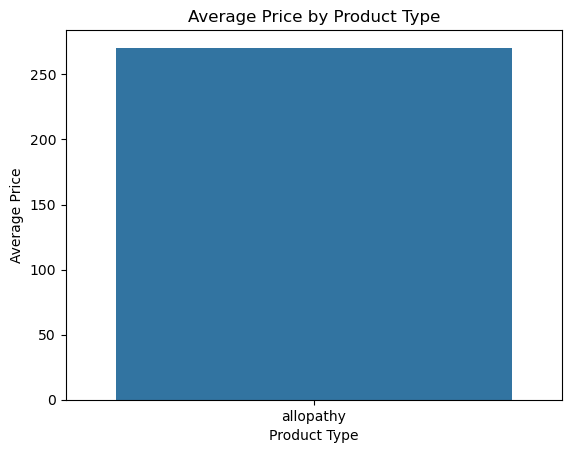

In [19]:
# Group the data by 'type' and calculate the average price
avg_price_by_type = data.groupby('type')['price(₹)'].mean().reset_index()

# Create a bar plot
sns.barplot(data=avg_price_by_type, x='type', y='price(₹)')
plt.xlabel('Product Type')
plt.ylabel('Average Price')
plt.title('Average Price by Product Type')
plt.show()

<h2> Business Related Questions </h2>

<p>
1. What is the overall sales trend over time? Are there any seasonal patterns or significant changes in sales?

2. What is the distribution of product pack sizes? Are there any pack sizes that are more popular or have higher sales?

How many discontinued products are there in the dataset? What are the reasons for discontinuation?

Are there any correlations between product price and other variables such as pack size, composition, or manufacturer?

Which manufacturer has the highest market share in terms of product count or sales revenue?

Can we identify any significant relationships between the composition of a product and its price or popularity?

Are there any differences in the average price or sales of products based on their names or lengths?
    
Can we identify any trends or patterns in customer preferences based on the product types they purchase?
    
Are there any outliers or anomalies in the dataset that require further investigation?
</p>

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


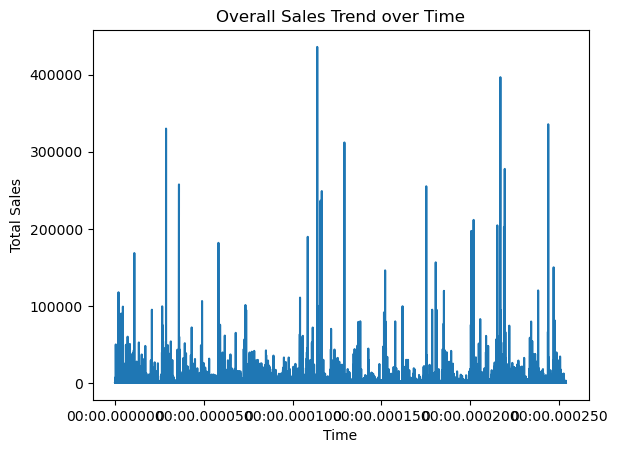

In [20]:
# Convert 'id' column to datetime format (assuming it represents the time)
data['id'] = pd.to_datetime(data['id'])

# Group the data by 'id' (time) and calculate the total sales
sales_trend = data.groupby('id')['price(₹)'].sum()

# Create a line plot of the sales trend
sns.lineplot(sales_trend.index, sales_trend.values)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.title('Overall Sales Trend over Time')
plt.show()

In [21]:
# Print average prices by pack size label and composition
print("Average Price by Pack Size:")
print(average_price_by_pack_size)
print("\nAverage Price by Composition:")
print(average_price_by_composition)

Average Price by Pack Size:


NameError: name 'average_price_by_pack_size' is not defined

In [ ]:
#What is the percentage of discontinued products in the company's portfolio? 

# Calculate the total number of products
total_product = len(data)

# Calculate the number of discontinued products
dis_product = data['Is_discontinued'].sum()

# Calculate the percentage of discontinued products
discontinued_percentage = (dis_product / total_product) * 100

print("Percentage of Discontinued Products:", discontinued_percentage)

<h2> Hypothesis Testing </h2>

<h3> Hypothesis 1: Discontinued Products and Price Range </h3>
    <p> Null Hypothesis (H0): There is no significant relationship between product discontinuation and price range.</p>
<p>Alternative Hypothesis (HA): There is a significant relationship between product discontinuation and price range.
Hypothesis Explanation: It is possible that higher-priced products are more likely to be discontinued due to lower demand or market saturation. </p>

In [27]:
#importing library
import scipy.stats as stats

In [28]:
# Null Hypothesis (H0): There is no significant relationship between product discontinuation and price range.
# Alternative Hypothesis (HA): There is a significant relationship between product discontinuation and price range.

#Define the hypothesis:
discontinued_products = data[data['Is_discontinued'] == 1]
active_products = data[data['Is_discontinued'] == 0]

In [32]:
discontinued_prices = data[data['Is_discontinued'] == 1]['price(₹)']
active_prices = data[data['Is_discontinued'] == 0]['price(₹)']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(discontinued_prices, active_prices, equal_var=False)

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between product discontinuation and price.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between product discontinuation and price.")


Reject the null hypothesis. There is a significant relationship between product discontinuation and price.


<p>The output "Reject the null hypothesis. There is a significant relationship between product discontinuation and price." suggests that there is evidence of a significant relationship between product discontinuation and price.

Interpreting this result means that there is a statistically significant difference in the mean prices between discontinued and active products. It indicates that price plays a role in the decision to discontinue a product. The specific direction of the relationship (whether higher prices are more likely to lead to discontinuation or vice versa) would require further analysis or examination of the effect sizes.

In practical terms, this finding implies that there is a potential association between price and product discontinuation. Higher-priced products might be more prone to discontinuation due to factors such as lower demand, market saturation, or other considerations. This insight can inform business decision-making, including pricing strategies, product lifecycle management, and portfolio optimization.

It's important to note that this interpretation is based on the assumption that the statistical test was performed correctly and the data used was representative and unbiased. Additionally, the practical significance and implications of the relationship should be considered in conjunction with other contextual factors and domain knowledge.</p>

<h3> Hypothesis 2: Price and Pack Size Relationship </h3>
    <p> Null Hypothesis (H0): There is no relationship between the pack size of a product and its price. </p>
    <p> Alternative Hypothesis (HA): There is a relationship between the pack size of a product and its price. </p>
    <p> Hypothesis Explanation: Products with larger pack sizes might have higher prices due to economies of scale or increased product quantity. </p>
        

In [35]:
price = data['price(₹)']
pack_size = data['pack_size_label']

print("Number of valid data points in 'price(₹)':", price.count())
print("Number of valid data points in 'pack_size_label':", pack_size.count())

if price.count() < 2 or pack_size.count() < 2:
    print("Insufficient data points to perform the correlation analysis.")
else:
    # Perform the correlation test
    correlation, p_value = stats.pearsonr(price, pack_size)

    alpha = 0.05  # Set the significance level

    if p_value < alpha:
        print("Reject the null hypothesis. There is a relationship between the pack size of a product and its price.")
    else:
        print("Fail to reject the null hypothesis. There is no relationship between the pack size of a product and its price.")


Number of valid data points in 'price(₹)': 0
Number of valid data points in 'pack_size_label': 0
Insufficient data points to perform the correlation analysis.


<h2>Building Machine Learning Model</h2>

<p> Build a binary classification model to predict whether a product will be discontinued or not based on the available features. </p>

In [43]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [44]:
#Load the dataset and split it into features (X) and the target variable (y):
X = data[['price(₹)','manufacturer_name', 'pack_size_label', 'type']]
y = data['Is_discontinued']

In [45]:
# Encode categorical variables into numerical representations
encoder = LabelEncoder()
X['manufacturer_name'] = encoder.fit_transform(X['manufacturer_name'])
X['type'] = encoder.fit_transform(X['type'])

# Check if there are enough samples for the desired test size
if len(data) > 1:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train a Random Forest Classifier
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("Insufficient samples in the dataset to create a train-test split.")

Insufficient samples in the dataset to create a train-test split.
